<a href="https://colab.research.google.com/github/caroll675/colab/blob/main/spikedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from scipy import io
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors
import matplotlib.pyplot as plt


In [57]:
# load mat file data
data = io.loadmat('/content/drive/MyDrive/ColabNotebooks/TemporalDiscount/allOptoCells.mat', struct_as_record=False, squeeze_me=True)
allOptoCells = data['allOptoCells']
# print the fieldnames
allOptoCells[0]._fieldnames

['idx', 'cellID', 'mouse', 'session', 'psth_stim', 'psth_odor']

In [75]:
# create dataframe
pattern = 3
stim_df = [pd.DataFrame()]*pattern
for k in range(pattern):
  rows = []
  for i in range(len(allOptoCells)):
      cell = allOptoCells[i]
      idx = cell.idx
      cellID = cell.cellID
      mouse = cell.mouse
      session = cell.session
      psth_stim = cell.psth_stim[k, :]
      numBins_stim = len(psth_stim)
      row = {
          'idx': idx,
          'cellID': cellID,
          'mouse': mouse,
          'session': session,
      }
      for i in range(numBins_stim):
          binID = i
          binVal = psth_stim[i]
          row[f'stim_{binID}'] = binVal
      rows.append(row)
  stim_df[k] = pd.DataFrame(rows)

In [129]:
# create dataframe
tt = 4
odor_df = [pd.DataFrame()]*tt
for k in range(tt):
  rows = []
  for i in range(len(allOptoCells)):
      cell = allOptoCells[i]
      idx = cell.idx
      cellID = cell.cellID
      mouse = cell.mouse
      session = cell.session
      psth_odor = cell.psth_odor[k, :]
      numBins_odor = len(psth_odor)
      row = {
          'idx': idx,
          'cellID': cellID,
          'mouse': mouse,
          'session': session,
      }
      for i in range(numBins_odor):
          binID = i
          binVal = psth_odor[i]
          row[f'odor_{binID}'] = binVal
      rows.append(row)
  odor_df[k] = pd.DataFrame(rows)

In [163]:
sub_odor_df = [df[df['mouse']=='CC4'] for df in odor_df]
print('number of neurons = ', len(sub_odor_df[0]))

number of neurons =  8


In [164]:
odor_means = []
odor_stds = []
for i in range(tt):
  tmp_df = sub_odor_df[i]
  tmp_df = tmp_df[[col for col in tmp_df if col.startswith('odor')]]
  odor_means.append(tmp_df.mean())
  odor_stds.append(tmp_df.std())

In [165]:
colors = {
    0: (171/255, 92/255, 154/255),
    1: (138/255, 110/255, 168/255),
    2: (136/255, 172/255, 215/255),
    3: (142/255, 206/255, 216/255),
}

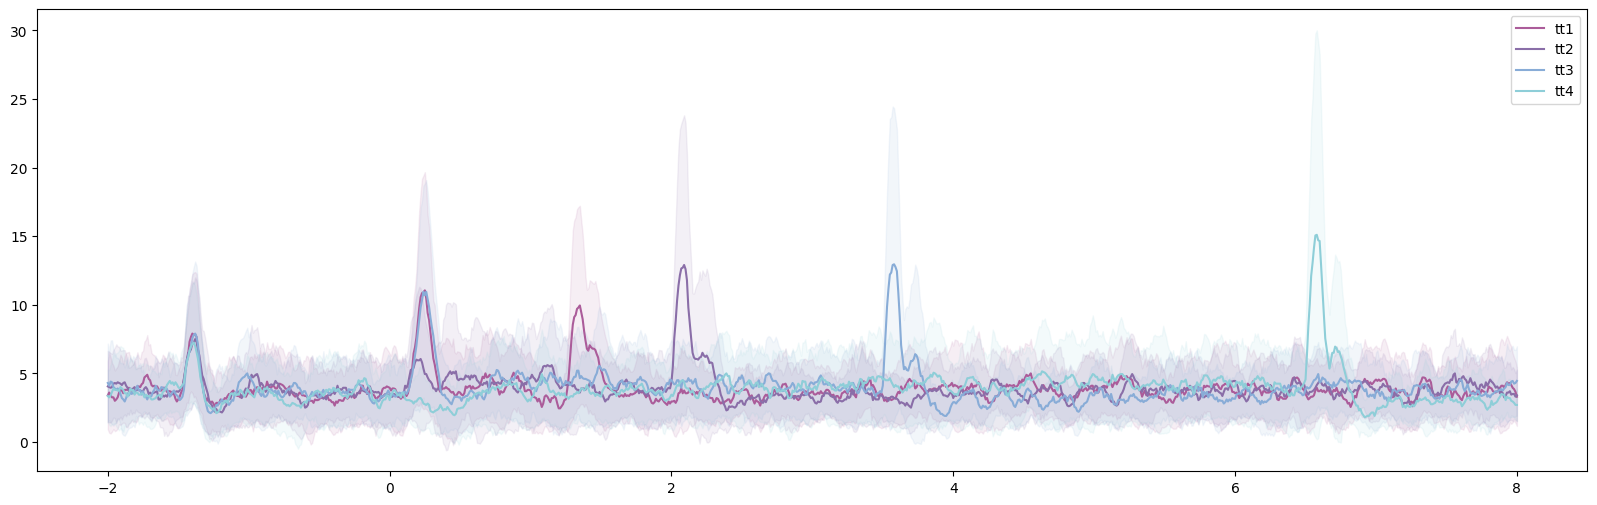

In [166]:
plt.figure(figsize=(20, 6))
for i in range(len(odor_means)):
  plt.plot(np.linspace(-2, 8, len(odor_means[i])), odor_means[i], label='tt' + str(i+1), color=colors[i])
  plt.fill_between(np.linspace(-2, 8, len(odor_stds[i])), odor_means[i] - odor_stds[i], odor_means[i] + odor_stds[i], color=colors[i], alpha=0.1)
plt.legend()